In [1]:
from nanopelican.models import load_experiment
import matplotlib.pyplot as plt

In [2]:
model, history = load_experiment('experiments/test-0')

In [3]:
print(model.__dict__)

{'_self_setattr_tracking': True, '_obj_reference_counts_dict': ObjectIdentityDictionary({<_ObjectIdentityWrapper wrapping True>: 3, <_ObjectIdentityWrapper wrapping <keras.src.saving.serialization_lib.Config object at 0x000001C241209CD0>>: 1, <_ObjectIdentityWrapper wrapping 1>: 2, <_ObjectIdentityWrapper wrapping 'relu'>: 1, <_ObjectIdentityWrapper wrapping 'fourvec'>: 1, <_ObjectIdentityWrapper wrapping 0.025>: 1, <_ObjectIdentityWrapper wrapping <nanopelican.layers.inputs.DataHandler object at 0x000001C240BF8B90>>: 1, <_ObjectIdentityWrapper wrapping <nanopelican.layers.lineq.Lineq2v2nano object at 0x000001C2414B1C10>>: 1, <_ObjectIdentityWrapper wrapping <nanopelican.layers.lineq.Lineq2v0nano object at 0x000001C24272C550>>: 1, <_ObjectIdentityWrapper wrapping <keras.src.saving.serialization_lib.Config object at 0x000001C23E928B10>>: 1, <_ObjectIdentityWrapper wrapping <keras.src.optimizers.adamw.AdamW object at 0x000001C240D87C10>>: 1, <_ObjectIdentityWrapper wrapping <keras.src.en

In [4]:
for key in history:
    print(key)

loss = history['loss']
acc = history['acc']
val_loss = history['val_loss']
val_acc = history['val_acc']
args = history['args']

loss
acc
val_loss
val_acc
args


In [5]:
for key, val in args.__dict__.items():
    print(key, val)

n_hidden 1
n_outputs 1
activation relu
dropout_rate 0.025
use_batchnorm True
data_dir data/sample_data
data_format fourvec
feature_key Pmu
label_key is_signal
num_particles 80
print_summary True
batch_size 512
epochs 40
validation_size 1000
experiment_root experiments
experiment_name test


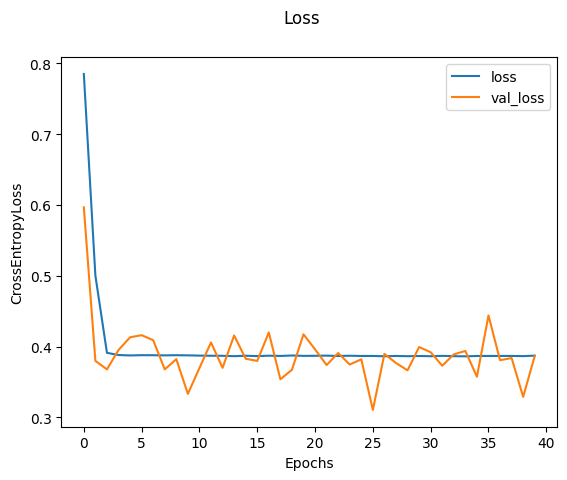

In [6]:
fig, ax = plt.subplots()
ax.plot(loss, label='loss')
ax.plot(val_loss, label='val_loss')
ax.set_ylabel("CrossEntropyLoss")
ax.set_xlabel("Epochs")
fig.suptitle("Loss")
plt.legend()

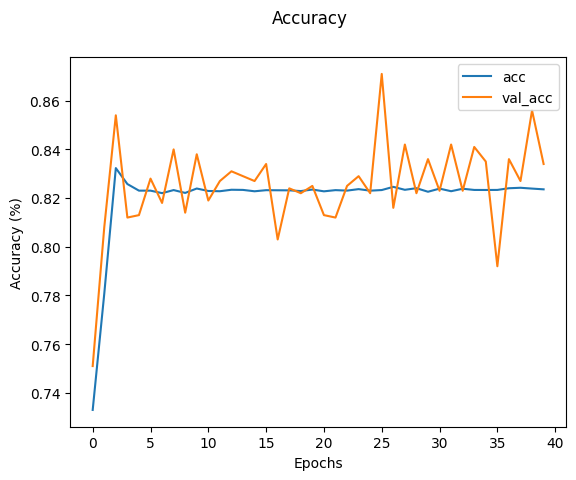

In [7]:
fig, ax = plt.subplots()
ax.plot(acc, label='acc')
ax.plot(val_acc, label='val_acc')
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Epochs")
fig.suptitle("Accuracy")
plt.legend()

In [8]:

optimizer = model.optimizer
conf = optimizer.get_config()['learning_rate']#['config']

In [9]:
import tensorflow as tf
scheduler = optimizer._learning_rate
steps = tf.range(scheduler.epochs*scheduler.steps_per_epoch, dtype=tf.float32, delta=scheduler.steps_per_epoch//10)
learning_rate = tf.map_fn(scheduler, steps)


Text(0.5, 0.98, 'LR schedule')

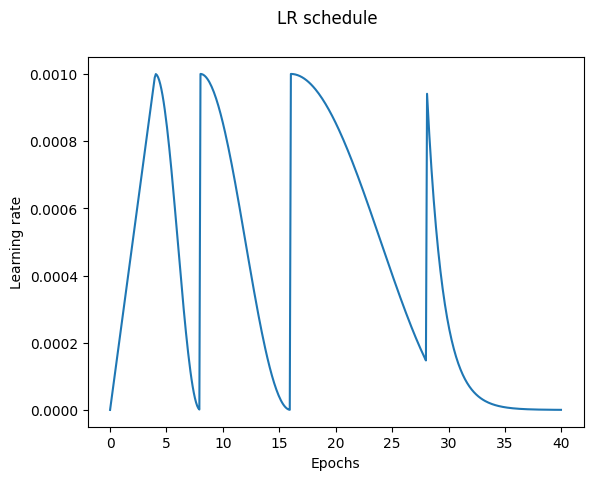

In [10]:
plt.plot(steps / scheduler.steps_per_epoch, learning_rate)
plt.xlabel("Epochs")
plt.ylabel("Learning rate")
plt.suptitle("LR schedule")